In [91]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

Our objective is to explore the factors that contribute to international viewership of NBA games.

In [92]:
#Read necessary data sets
viewers = pd.read_csv("data/training_set.csv")
players = pd.read_csv("data/player_data.csv")
players = players.where(players['Active_Status'] == 'Active').dropna()

ASVotes_2017 = pd.read_csv("data/2017_ASG.csv")
ASVotes_2018 = pd.read_csv("data/2018_ASG.csv")

In [93]:
viewers.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded_Viewers
0,2016-17,21600001,10/25/2016,NYK,CLE,C113,18
1,2016-17,21600001,10/25/2016,NYK,CLE,C193,1
2,2016-17,21600001,10/25/2016,NYK,CLE,C126,4
3,2016-17,21600001,10/25/2016,NYK,CLE,C163,11
4,2016-17,21600001,10/25/2016,NYK,CLE,C73,3


In [94]:
players.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,Minutes,Points,...,Steals,Blocks,Turnovers,Field_Goals,Field_Goals_Attempted,Three_Pointers,Three_Pointers_Attempted,Free_Throws,Free_Throws_Attempted,Personal_Fouls
0,2016-17,21600001.0,10/25/2016,CLE,101112.0,Channing Frye,None,Active,14.0,6.0,...,1.0,1.0,1.0,2.0,6.0,2.0,5.0,0.0,0.0,4.0
1,2016-17,21600001.0,10/25/2016,CLE,201567.0,Kevin Love,East ASG,Active,25.0,23.0,...,3.0,0.0,2.0,6.0,15.0,2.0,6.0,9.0,12.0,3.0
2,2016-17,21600001.0,10/25/2016,CLE,202681.0,Kyrie Irving,East ASG,Active,30.0,29.0,...,2.0,0.0,0.0,12.0,22.0,4.0,7.0,1.0,1.0,1.0
3,2016-17,21600001.0,10/25/2016,CLE,202684.0,Tristan Thompson,None,Active,22.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,2016-17,21600001.0,10/25/2016,CLE,202697.0,Iman Shumpert,None,Active,14.0,2.0,...,0.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0


In [95]:
#Sum all of the viewers for each game throughout every country
viewers = viewers.groupby(['Season', 'Game_ID', 'Game_Date', 'Away_Team', 'Home_Team'], as_index = False).agg(np.sum)
viewers = viewers.rename(columns = {'Rounded_Viewers':'Total_Viewers'})
viewers.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600001,10/25/2016,NYK,CLE,57691
1,2016-17,21600002,10/25/2016,UTA,POR,40740
2,2016-17,21600003,10/25/2016,SAS,GSW,60428
3,2016-17,21600004,10/26/2016,MIA,ORL,22756
4,2016-17,21600005,10/26/2016,DAL,IND,33922


The first factor we'll look at will be day and month. We want to see if some months or days tend to attract more viewers than others.

In [96]:
#Convert 'Game_ID' to a string variable
viewers['Game_ID'] = viewers['Game_ID'].apply(str)

#Get month and day by both name and number. October is 1 because it's when the NBA season starts
viewers['Month'] = viewers['Game_Date'].apply(lambda x: datetime.strptime(x,"%m/%d/%Y").strftime("%B"))
viewers['Weekday'] = viewers['Game_Date'].apply(lambda x: datetime.strptime(x,"%m/%d/%Y").strftime("%A"))
viewers['Day_Num'] = viewers['Game_Date'].apply(lambda x: datetime.strptime(x,"%m/%d/%Y").weekday())
month_num = {'October':1,'November':2,'December':3,'January':4,'February':5,'March':6,'April':7}
viewers['Month_Num'] = viewers['Month'].map(month_num)

viewers.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,Month,Weekday,Day_Num,Month_Num
0,2016-17,21600001,10/25/2016,NYK,CLE,57691,October,Tuesday,1,1
1,2016-17,21600002,10/25/2016,UTA,POR,40740,October,Tuesday,1,1
2,2016-17,21600003,10/25/2016,SAS,GSW,60428,October,Tuesday,1,1
3,2016-17,21600004,10/26/2016,MIA,ORL,22756,October,Wednesday,2,1
4,2016-17,21600005,10/26/2016,DAL,IND,33922,October,Wednesday,2,1


In [97]:
#Calculate average monthly and daily viewership
monthly_viewers = viewers.groupby('Month',as_index=False).agg(np.mean).sort_values('Month_Num').drop(['Month_Num','Day_Num'],axis=1).rename(columns={'Total_Viewers':'Avg_Monthly_Viewers'})
daily_viewers = viewers.groupby('Weekday',as_index=False).agg(np.mean).sort_values('Day_Num').drop(['Month_Num','Day_Num'],axis=1).rename(columns={'Total_Viewers':'Avg_Daily_Viewers'})

In [98]:
monthly_viewers

,Month,Avg_Monthly_Viewers
6,October,26877.960630
5,November,19631.377410
1,December,16159.407008
3,January,17001.851312
2,February,15392.463602
4,March,14287.091864
0,April,13689.207792


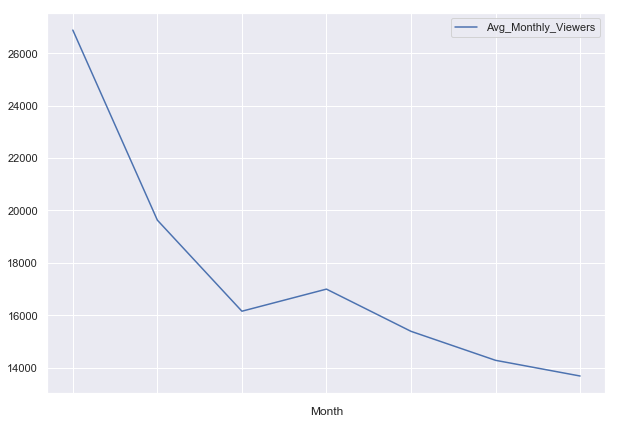

In [99]:
monthly_viewers.plot(x = 'Month', y = 'Avg_Monthly_Viewers')

According to our data, viewership is at its highest when the season begins, and progressively deminishes, except for a small spike at the beginning of the year.

In [100]:
daily_viewers

,Weekday,Avg_Daily_Viewers
1,Monday,16268.482759
5,Tuesday,17485.631373
6,Wednesday,14639.956633
4,Thursday,20862.146067
0,Friday,16564.732955
2,Saturday,17376.184564
3,Sunday,18287.272340


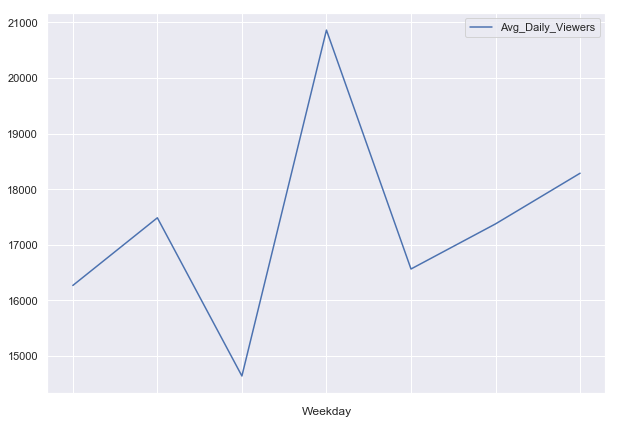

In [101]:
daily_viewers.plot(x = 'Weekday',y = 'Avg_Daily_Viewers')

Average viewership seems to be abnormally high on Thurdays. This is possibly due to the way that networks schedule games. Certain days may be reserved for the biggest and most widely available games.

Next, we'll look at the composition of the teams in each respective game. We'll use the number of all stars and the number of all-star starter votes as proxies for strength of the player and popularity respectively. NBA fans vote for the starters, and the coaches vote for the rest of the roster, so we believe these to be good approximate measures. 

In [102]:
players = players[['Season', 'Game_ID', 'Game_Date', 'Team', 'Person_ID', 'Name', 'ASG_Team', 'Active_Status']]

#Split data by year
viewers_2017 = viewers[viewers['Season'] == "2016-17"]
viewers_2018 = viewers[viewers['Season'] == "2017-18"]
players_2017 = players[players['Game_ID'] < 21700000]
players_2018 = players[players['Game_ID'] > 21700000]

#Covert 'Game_ID' to a string variable
players_2017['Game_ID'] = players_2017['Game_ID'].apply(lambda x:str(int(x)))
players_2018['Game_ID'] = players_2018['Game_ID'].apply(lambda x:str(int(x)))

players_2017.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status
0,2016-17,21600001,10/25/2016,CLE,101112.0,Channing Frye,None,Active
1,2016-17,21600001,10/25/2016,CLE,201567.0,Kevin Love,East ASG,Active
2,2016-17,21600001,10/25/2016,CLE,202681.0,Kyrie Irving,East ASG,Active
3,2016-17,21600001,10/25/2016,CLE,202684.0,Tristan Thompson,None,Active
4,2016-17,21600001,10/25/2016,CLE,202697.0,Iman Shumpert,None,Active


In [103]:
def ASG(team):
    """Return 1 if player was an all-star"""
    if team != "None":
        return 1
    else:
        return 0

def to_int(num):
    if isinstance(num,str):
        return int(num.replace(',',''))
    else:
        return int(num)

players_2017['AS'] = players_2017['ASG_Team'].apply(ASG)
players_2018['AS'] = players_2018['ASG_Team'].apply(ASG)

players_2017 = players_2017.merge(ASVotes_2017,on = 'Name', how = 'left')
players_2017['Votes'] = players_2017['Votes'].fillna(value = 0).apply(to_int)
players_2018 = players_2018.merge(ASVotes_2018, on = 'Name', how = 'left')
players_2018['Votes'] = players_2018['Votes'].fillna(value = 0).apply(to_int)

players_2017.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,AS,Votes
0,2016-17,21600001,10/25/2016,CLE,101112.0,Channing Frye,None,Active,0,46384
1,2016-17,21600001,10/25/2016,CLE,201567.0,Kevin Love,East ASG,Active,1,909488
2,2016-17,21600001,10/25/2016,CLE,202681.0,Kyrie Irving,East ASG,Active,1,1696769
3,2016-17,21600001,10/25/2016,CLE,202684.0,Tristan Thompson,None,Active,0,245822
4,2016-17,21600001,10/25/2016,CLE,202697.0,Iman Shumpert,None,Active,0,50970


Since player popularity is likely an important factor for viewership, we merged data about the number of all star votes a player got onto our player data sets.`AS` is just an indicator for whether or not the player made the All Star team.

In [104]:
#Calculate total number of all-stars and votes for each game
p17 = players_2017.groupby('Game_ID', as_index = False).agg(np.sum).drop('Person_ID', axis = 1)
p18 = players_2018.groupby('Game_ID', as_index = False).agg(np.sum).drop('Person_ID', axis = 1)

p17.head()

,Game_ID,AS,Votes
0,21600001,4,6442929
1,21600002,0,667266
2,21600003,5,9984969
3,21600004,0,315854
4,21600005,1,712937


In [105]:
viewers_2017 = viewers_2017.merge(p17, on = 'Game_ID')
viewers_2018 = viewers_2018.merge(p18, on = 'Game_ID')

viewers_2017.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,Month,Weekday,Day_Num,Month_Num,AS,Votes
0,2016-17,21600001,10/25/2016,NYK,CLE,57691,October,Tuesday,1,1,4,6442929
1,2016-17,21600002,10/25/2016,UTA,POR,40740,October,Tuesday,1,1,0,667266
2,2016-17,21600003,10/25/2016,SAS,GSW,60428,October,Tuesday,1,1,5,9984969
3,2016-17,21600004,10/26/2016,MIA,ORL,22756,October,Wednesday,2,1,0,315854
4,2016-17,21600005,10/26/2016,DAL,IND,33922,October,Wednesday,2,1,1,712937


We merged the player data indicating the number of all stars in a game to our main data sets.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


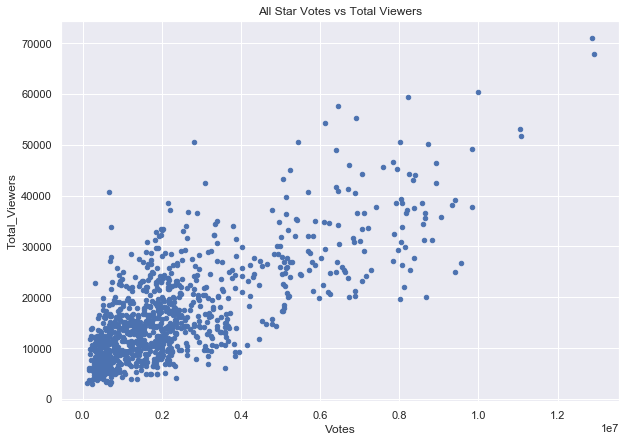

In [106]:
viewers_2017.plot.scatter(x = 'Votes', y = 'Total_Viewers', title = "All Star Votes vs Total Viewers")

We can see that there is a clear positive relationship between the number of all star votes a team received and the number of total viewers.

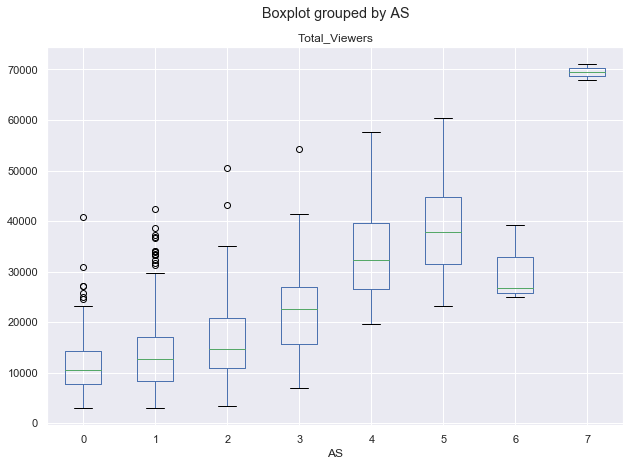

In [107]:
viewers_2017.boxplot(column='Total_Viewers', by='AS', figsize=(10,7))

In [108]:
viewers_2017[viewers_2017['AS'] == 6]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,Month,Weekday,Day_Num,Month_Num,AS,Votes
132,2016-17,21600165,11/16/2016,GSW,TOR,39188,November,Wednesday,2,2,6,9400282
397,2016-17,21600485,12/28/2016,TOR,GSW,24909,December,Wednesday,2,3,6,9400282
981,2016-17,21601195,4/8/2017,NOP,GSW,26725,April,Saturday,5,7,6,9559935


As expected, the more All Stars present for a game, the more viewers we can expect for that game.There is an unexpected drop in viewership when there are 6 All Stars. This is likely due to some other factors like the weekday or month when those games happened. Since there were only 3 games that featured 6 All Stars, the average viewership has a fairly high variance.

In [109]:
viewers_2017.corr()['Total_Viewers']

Total_Viewers    1.000000
Day_Num          0.100132
Month_Num       -0.277465
AS               0.624570
Votes            0.749681
Name: Total_Viewers, dtype: float64

Out of the features that we have examined thus far, the number of All Star votes seems to be the most strongly correlated. However, because the other features are categorical in nature rather than continuous and quantitative, we probably should not put too much stock into their correlations. Each of these factors definitely plays a part in total viewership.

Now we will look at the strength of each team as a factor in viewrship.

In [110]:
def by_team(viewers):
    """Return a DataFrame with each team's average viewership and average number of AS votes"""
    by_team = pd.DataFrame(columns = ['Team', 'Avg_Viewers', 'Votes'])
    for team in viewers['Away_Team'].unique():
        a = viewers['Away_Team'] == team
        b = viewers['Home_Team'] == team
        avg_viewers = pd.concat([viewers[a], viewers[b]])['Total_Viewers'].mean()
        avg_votes = pd.concat([viewers[a], viewers[b]])['Votes'].mean()
    
        row = pd.DataFrame([[team, avg_viewers, avg_votes], ], columns = ['Team', 'Avg_Viewers', 'Votes'])
        by_team = by_team.append(row)
    return by_team

by_team17 = by_team(viewers_2017)
by_team18 = by_team(viewers_2018)

In [111]:
by_team17 = by_team17.sort_values('Avg_Viewers', ascending=False)
by_team17

,Team,Avg_Viewers,Votes
0,GSW,35505.300000,8.084181e+06
0,CLE,31757.691176,5.811344e+06
0,OKC,24420.531250,3.098927e+06
0,SAS,21187.900000,3.100491e+06
0,NYK,20320.236111,2.298318e+06
0,HOU,19030.176471,4.229003e+06
0,LAL,18873.114286,2.208032e+06
0,BOS,18736.076923,2.054360e+06
0,CHI,18704.805970,2.689271e+06
0,LAC,16973.295775,2.410083e+06


In [112]:
#Read standings data
standings17 = pd.read_csv('data/NBA_Standings17.csv')
standings18 = pd.read_csv('data/NBA_Standings18.csv')

by_team17 = by_team17.merge(standings17, on = 'Team')

In [113]:
#Calculate the median win percentage for the 2016-2017 season
median_perc = np.median(by_team17['Percentage'])
median_perc

0.5

In [114]:
#Choose the color coding for the bar chart. Above average teams are in orange, and below average teams in blue
def choose_color(perc):
    if perc > 0.5:
        return sns.xkcd_rgb["orange"]
    else:
        return sns.xkcd_rgb["denim blue"]
colors = np.array(by_team17['Percentage'].apply(choose_color))

<BarContainer object of 29 artists>

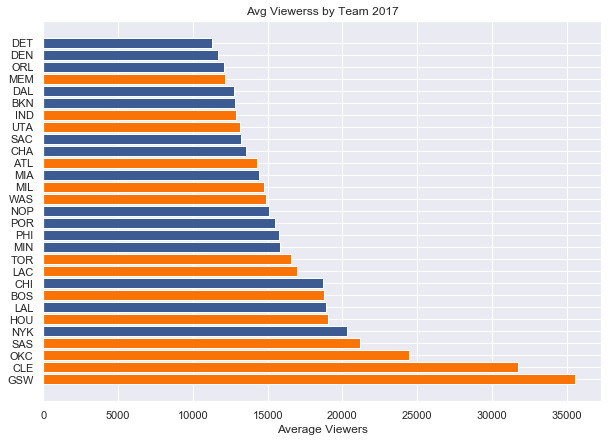

In [115]:
plt.rcParams['figure.figsize'] = (10,7)
plt.title('Avg Viewerss by Team 2017')
plt.xlabel('Average Viewers')
plt.barh(y = by_team17['Team'], width = by_team17['Avg_Viewers'], color = colors)

We now examine the average viewership for each NBA team during the 2017 season. Some of the results are surprising. For example, the New York Knicks(NYK) and Los Angelse Lakers(LAL) both finished near the bottom in the standings but are in the top seven in average viewership. Similarly, the Utah Jazz(UTA) are in the top eight in win percentage, but in the bottom eight in average viewership.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


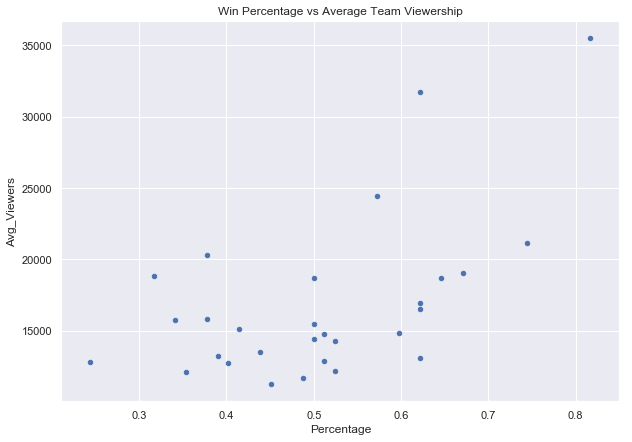

In [120]:
by_team17.plot.scatter(x = 'Percentage', y = 'Avg_Viewers', title = 'Win Percentage vs Average Team Viewership')

While there is some relationship between win percentage and the number of viewers, the trend seems to be fairly weak. There is a fair bit of variance in the viewership for a given win percentage.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


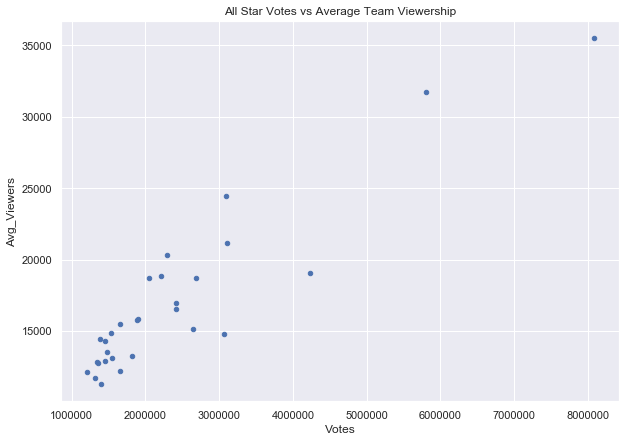

In [117]:
by_team17.plot.scatter(x = 'Votes', y = 'Avg_Viewers', title = 'All Star Votes vs Average Team Viewership')

In [118]:
by_team17.corr()['Avg_Viewers']

Avg_Viewers     1.000000
Votes           0.920166
Position       -0.506661
Percentage      0.561135
Games_Behind   -0.332019
Pts_Scored      0.598786
Pts_Allowed     0.042987
Name: Avg_Viewers, dtype: float64

Based on the scatterplot and the correlations, it's clear that the popularity of the players on the team is more important for viewership than the strength of the team. Another interesting observation based on the correlations is that the strength of a team's offense is correlated to its viewership while the strngth of its defense is not.

Note: Team Points scored and allowed per game are not actually accurate measures of strength of ofense and defense respectively. However when compared to each other, the fact that only one of the two is correlated with viewership shows that offense is more important for viewership.